## (a) Solution to Lorenz Equations and plot of $y(t)$ vs. $t$

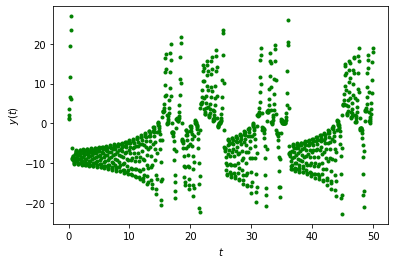

In [28]:
from numpy import arange
from pylab import plot, xlabel, ylabel, show, legend

sigma = 10.0
rho = 28.0
beta = 8.0/3.0

t0 = 0                         # initial time
tf = 50                       # final time
N = 1000                      # number time values
dt = (tf - t0)/N               # time step
tvals  = arange(t0, tf, dt)    # array of time values
x = 0                          # initial x with RK4 method
y = 1
z = 0

xList = []
yList = []
zList = []

def xprime(x, y):
    return sigma * (y - x)

def yprime(x, y, z):
    return (rho * x) - y - (x * z)

def zprime(x, y, z):
    return (x * y) - (beta * z)


for t in tvals:
    xList.append(x)
    yList.append(y)
    zList.append(z)
   
    # 4th-Order Runge-Kutta
    kx1 = dt*xprime(x, y)
    ky1 = dt*yprime(x, y, z)
    kz1 = dt*zprime(x, y, z)

    kx2 = dt*xprime(x + 0.5*kx1, y + 0.5*ky1)
    ky2 = dt*yprime(x + 0.5*kx1, y + 0.5*ky1, z + 0.5*kz1)
    kz2 = dt*zprime(x + 0.5*kx1, y + 0.5*ky1, z + 0.5*kz1)

    kx3 = dt*xprime(x + 0.5*kx2, y + 0.5*ky2)
    ky3 = dt*yprime(x + 0.5*kx2, y + 0.5*ky2, z + 0.5*kz2)
    kz3 = dt*zprime(x + 0.5*kx2, y + 0.5*ky2, z + 0.5*kz2)

    kx4 = dt*xprime(x + kx3, y + ky3)
    ky4 = dt*yprime(x + kx3, y + ky3, z + kz3)
    kz4 = dt*zprime(x + kx3, y + ky3, z + kz3)

    x += (kx1 + 2*kx2 + 2*kx3 + kx4)/6
    y += (ky1 + 2*ky2 + 2*ky3 + ky4)/6
    z += (kz1 + 2*kz2 + 2*kz3 + kz4)/6

# plot results
plot(tvals, yList, "g.")
xlabel("$t$")
ylabel("$y(t)$")
show()

## (b) Plot of $z(t)$ vs. $x(t)$

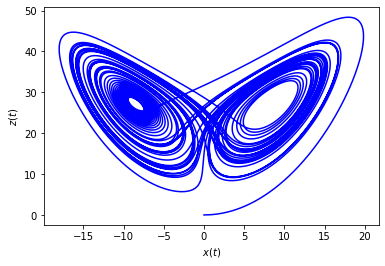

In [26]:
plot(xList, zList, "b-")
xlabel("$x(t)$")
ylabel("$z(t)$")
show()